In [1]:
from lxml import etree
import json
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline  
import seaborn as sns


# Parsing 

In [2]:
def parse(file_path): 
    i = 0 
    tmp = ''
    key = ''
    xml2 = etree.iterparse(file_path, recover=True)
    data = []
    for action, elem in xml2:
        data.append((elem.attrib, elem.tag, elem.text))
    data_dict = {}
    
    for attrib, tag, text in data: 
        try : 
            tmp = key
            
            key = attrib.get('qualifier')
            element = attrib.get('element')
            
            #way to distinguish eliminate some nan!
            if key == 'none':
                key = element
            
            if key in data_dict.keys() : 
                i = i + 1 
                data_dict[key + str(i)] = text
            else : 
                i = 0 
                data_dict[key] = text
                
        except TypeError: 
            if 'subject' in tag:
                if 'subject' in data_dict.keys():
                    data_dict['subject'].append(text)
                else:
                    data_dict['subject'] = [text]

    return data_dict


### Get all data 

In [3]:
import os
rootdir = '/Users/lguillain/Documents/EPFL2018/Semester-Project/papers-import/'
nchouf = os.walk(rootdir)

In [4]:
all_data = {}
i= 0
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        path = os.path.join(subdir, file)
        if 'dublin_core' in (path) : 
            i += 1
            num_doc = subdir[len(rootdir):]
            if num_doc in all_data.keys():
                all_data[num_doc+'_'] = parse(path)
            else : 
                all_data[num_doc] = parse(path)

In [5]:
print('got data from {} files'.format(i))

got data from 428 files


In [6]:
#all_data.values()

In [7]:
columns = set()
for keys,items in all_data.items():
    for keys_in,items_in in items.items():
        columns.add(keys_in)

In [8]:
df_data = pd.DataFrame(index=all_data.keys(),columns=columns)

In [9]:
for ind in df_data.index:
    for column in columns: 
        try : 
            df_data.loc[ind,column] = all_data[ind][column]
        except KeyError:
            df_data.loc[ind,column] = ''

In [10]:
df_data['citation'].head()

import2016full/61    Abrahamson, D., Shayan, S., Bakker, A., & van ...
import2016full/95    Sandoval, W. A., Kawasaki, J., Cournoyer, N., ...
import2016full/59    DeLiema, D., Saleh, A., Lee, C., Enyedy, N., D...
import2016full/92    Hardy, L. & White, T. (2016). Making Sense of ...
import2016full/66    Raval, H., Kaul, C., & McKenney, S. (2016). Th...
Name: citation, dtype: object

In [11]:
df_data.head()

,author16,author2,author17,abstract,author13,author20,author12,uri,author6,iso,...,issued,author10,author5,accessioned,author19,author9,author21,None,author18,author7
import2016full/61,,"Bakker, Arthur",,The combination of two methodological resource...,,,,info:doi/10.22318/icls2016.61,,en,...,2016-07,,,2017-03-21T12:05:42Z,,,,\n,,
import2016full/95,,"Cournoyer, Nathan",,Abstract: The Next Generation Science Standard...,,,,info:doi/10.22318/icls2016.95,,en,...,2016-07,,,2017-03-21T12:05:42Z,,,,\n,,
import2016full/59,,"Lee, Christine",,Researchers have increasingly demonstrated how...,,,,info:doi/10.22318/icls2016.59,"Dahn, Maggie",en,...,2016-07,,"Illum, Randy",2017-03-21T12:05:42Z,,,,\n,,"Humburg, Megan"
import2016full/92,,,,In this paper we argue that collaborative lear...,,,,info:doi/10.22318/icls2016.92,,en,...,2016-07,,,2017-03-21T12:05:42Z,,,,\n,,
import2016full/66,,"McKenney, Susan",,Although English is mandatorily introduced as ...,,,,info:doi/10.22318/icls2016.66,,en,...,2016-07,,,2017-03-21T12:05:42Z,,,,\n,,


In [12]:
def convert(arg): 
    try : 
        arg = dateutil.parser.parse(arg)
    except TypeError: 
        arg = arg 
    return arg 

In [13]:
import dateutil.parser
df_data['available'] = df_data['available'].apply(lambda x : convert(x))
df_data['accessioned'] = df_data['accessioned'].apply(lambda x : convert(x))

In [14]:
df_data[df_data['author'].str.contains("Vogel")]

,author16,author2,author17,abstract,author13,author20,author12,uri,author6,iso,...,issued,author10,author5,accessioned,author19,author9,author21,None,author18,author7
import2016full/78,,"Ufer, Stefan",,Students often have problems formulating und u...,,,,info:doi/10.22318/icls2016.78,,en,...,2016-07,,,2017-03-21 12:05:42+00:00,,,,\n,,
import2015short/373,,"Ufer, Stefan",,Argumentation scripts have been proposed as an...,,,,https://doi.dx.org/10.22318/cscl2015.373,,en,...,2015-07,,"Fischer, Frank",2017-06-19 14:51:54+00:00,,,,collaboration scripts,,


In [15]:
df_data.head()

,author16,author2,author17,abstract,author13,author20,author12,uri,author6,iso,...,issued,author10,author5,accessioned,author19,author9,author21,None,author18,author7
import2016full/61,,"Bakker, Arthur",,The combination of two methodological resource...,,,,info:doi/10.22318/icls2016.61,,en,...,2016-07,,,2017-03-21 12:05:42+00:00,,,,\n,,
import2016full/95,,"Cournoyer, Nathan",,Abstract: The Next Generation Science Standard...,,,,info:doi/10.22318/icls2016.95,,en,...,2016-07,,,2017-03-21 12:05:42+00:00,,,,\n,,
import2016full/59,,"Lee, Christine",,Researchers have increasingly demonstrated how...,,,,info:doi/10.22318/icls2016.59,"Dahn, Maggie",en,...,2016-07,,"Illum, Randy",2017-03-21 12:05:42+00:00,,,,\n,,"Humburg, Megan"
import2016full/92,,,,In this paper we argue that collaborative lear...,,,,info:doi/10.22318/icls2016.92,,en,...,2016-07,,,2017-03-21 12:05:42+00:00,,,,\n,,
import2016full/66,,"McKenney, Susan",,Although English is mandatorily introduced as ...,,,,info:doi/10.22318/icls2016.66,,en,...,2016-07,,,2017-03-21 12:05:42+00:00,,,,\n,,


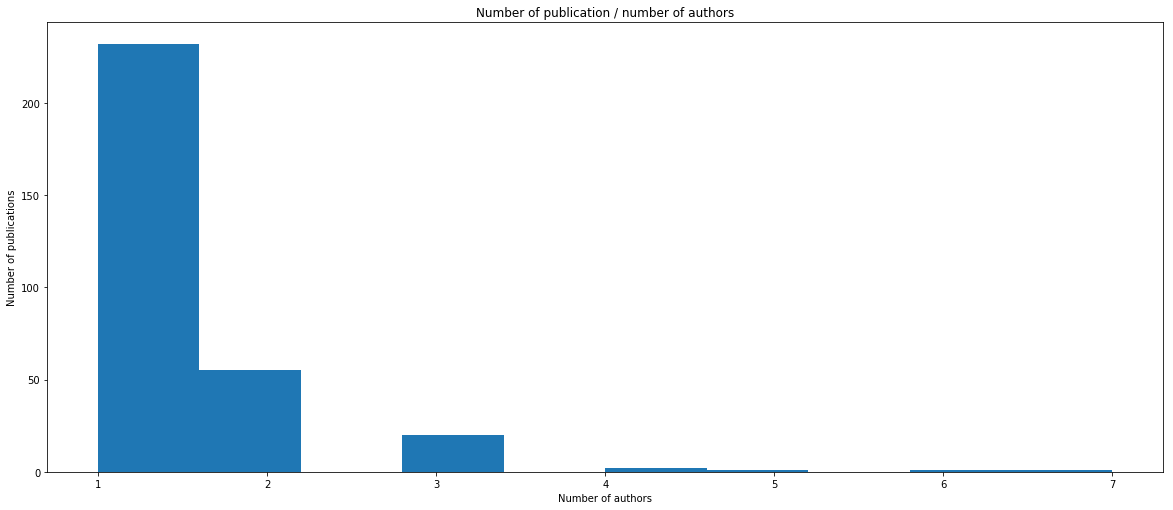

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
plt.xlabel('Number of authors')
plt.ylabel('Number of publications')
x = plt.title('Number of publication / number of authors')
x = plt.hist(df_data.groupby(by = 'author').count()['uri'])

In [17]:
y = df_data.groupby(by = 'author').count()['uri']

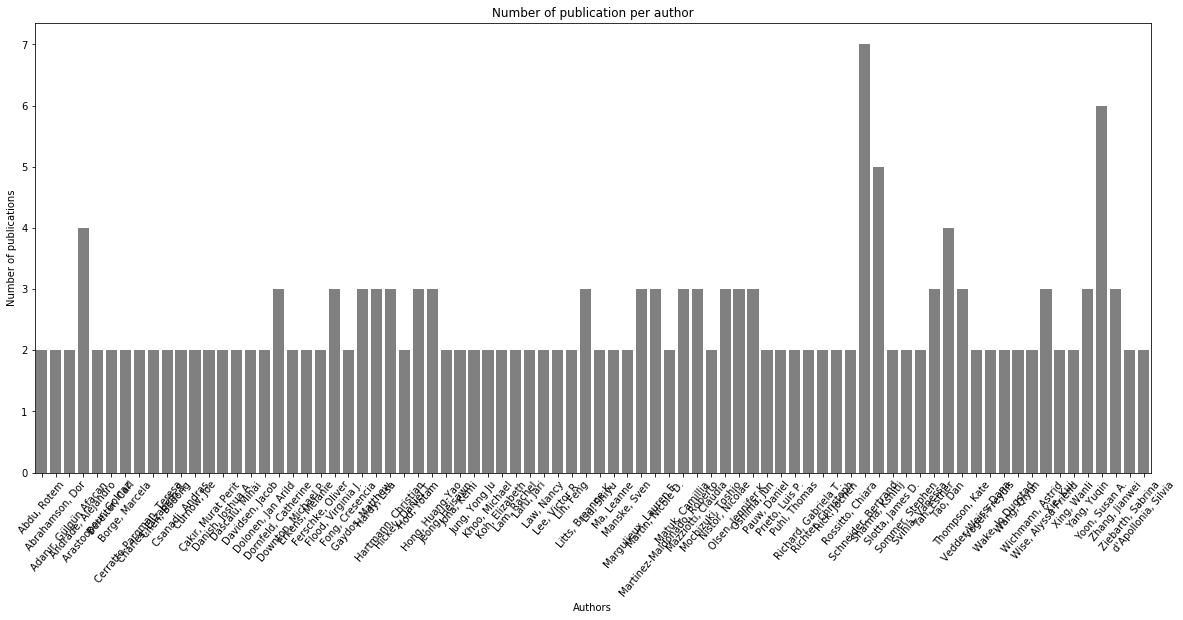

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8.27)
x = sns.barplot(y[y>1].index,y[y>1],color = 'grey')
plt.xticks(rotation=50)
plt.xlabel('Authors')
plt.ylabel('Number of publications')
x = plt.title('Number of publication per author')

# Getting all authors in to one dataframe:

In [19]:
df_data.columns

Index([   'author16',     'author2',    'author17',    'abstract',
          'author13',    'author20',    'author12',         'uri',
           'author6',         'iso',    'author23',   'publisher',
              'type',    'citation',     'author1',    'author11',
         'available',     'author3',     'author8',     'author4',
          'author15',       'title',     'subject',    'author22',
            'author',    'author14',      'issued',    'author10',
           'author5', 'accessioned',    'author19',     'author9',
          'author21',          None,    'author18',     'author7'],
      dtype='object')

In [20]:
cleaning = df_data.reset_index().melt(id_vars=['index','subject', 'iso', 'uri','type','publisher','title', 'issued', 'accessioned', 'citation', 'available', 'abstract'])

cleaning.dropna(inplace=True)
cleaning = cleaning[cleaning.value.map(lambda x: len(x) > 2)]

cleaning['author_name_length'] = cleaning.value.map(lambda x: len(x))

In [21]:
cleaning[cleaning.author_name_length < 5]

,index,subject,iso,uri,type,publisher,title,issued,accessioned,citation,available,abstract,variable,value,author_name_length


In [22]:
import re
cleaning['author_order'] =cleaning.variable.map(lambda x: 0 if len(re.search('\d*$', x).group(0)) == 0 else int(re.search('\d*$', x).group(0)))

In [23]:
del cleaning['variable']

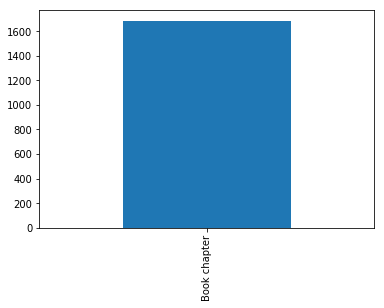

In [24]:
cleaning.value.value_counts().head().plot(kind='bar')

cleaning.publisher.value_counts().head().plot(kind='bar')

cleaning.type.value_counts().head().plot(kind='bar')

In [25]:
cleaning['index'].value_counts()

import2017/113          24
import2016short/167     20
import2017/115          19
import2017/114          18
import2015short/1110    18
import2017/117          18
import2015short/1107    15
import2016short/175     15
import2015short/1103    14
import2016short/176     13
import2015short/1101    12
import2016short/164     12
import2016short/173     12
import2015short/1116    12
import2015short/1118    11
import2016short/170     11
import2017/43           10
import2016short/177     10
import2017/94           10
import2016short/136     10
import2016short/165     10
import2015short/165     10
import2017/116          10
import2015full/165      10
import2016short/150     10
import2017/118          10
import2015short/176      9
import2016short/171      9
import2015full/176       9
import2016full/59        9
                        ..
import2017/88            1
import2016short/113      1
import2016full/30        1
import2015full/154       1
import2016full/85        1
import2017/13            1
i

In [26]:
cleaning.head()

,index,subject,iso,uri,type,publisher,title,issued,accessioned,citation,available,abstract,value,author_name_length,author_order
165,import2016short/167,,en,https://doi.dx.org/10.22318/icls2016.167,Book chapter,Singapore: International Society of the Learni...,Future Learning Spaces for Learning Communitie...,2016-07,2017-06-19 11:36:42+00:00,"Hod, Y., Charles, E. S., Acosta, A., Ben-Zvi, ...",2017-06-19 11:36:42+00:00,This symposium presents our efforts to reconce...,"Whittaker, Chris",16,16
281,import2015short/1110,"[learning communities, networked society, design]",en,https://doi.dx.org/10.22318/cscl2015.1110,Book chapter,International Society of the Learning Science...,Technology-Enhanced Learning Communities on a ...,2015-07,2017-06-19 14:51:54+00:00,"Kali, Y., Tabak, I., Ben-Zvi, D., Kidron, A., ...",2017-06-19 14:51:54+00:00,This symposium brings together the theoretical...,"Hoadley, Christopher",20,16
372,import2017/117,,en,https:dx.doi.org/10.22318/cscl2017.117,Book chapter,"Philadelphia, PA: International Society of the...",Libraries as Emerging Spaces for Computer-Supp...,2017-07,2017-06-19 10:53:01+00:00,"Lee, V. R., Tzou, C., Bang, M., Bell, P., Stro...",2017-06-19 10:53:01+00:00,Libraries are undergoing a reconceptualization...,"Recker, Mimi",12,16
403,import2017/115,,en,https:dx.doi.org/10.22318/cscl2017.115,Book chapter,"Philadelphia, PA: International Society of the...",Technology and Applications for Collaborative ...,2017-07,2017-06-19 10:53:01+00:00,"Greenwald, S. W., Kulik, A., Kunert, A., Beck,...",2017-06-19 10:53:01+00:00,In this symposium we explore the immense poten...,"Lee, Victoria",13,16
419,import2017/114,,en,https:dx.doi.org/10.22318/cscl2017.114,Book chapter,"Philadelphia, PA: International Society of the...",Making a Difference: Analytics for Quality Kno...,2017-07,2017-06-19 10:53:01+00:00,"de Jong, F., van den Ende, J., van Heijst, H.,...",2017-06-19 10:53:01+00:00,The symposium focuses on the analysis of the k...,"Hmelo-Silver, Cindy",19,16


# Now parse citation to get the shortened name (which can be matched to refrences)

In [27]:
import numpy as np
import regex #

In [28]:
get_names = r'([\w\-\&]*[\,] [\p{Lu}\.\ ]+[\&\,]?)'

cleaning.reset_index(drop=True, inplace=True)

cleaning['shortend_names'] = cleaning.citation.map(lambda x: re.match(r'[\S\s]*\(\d{4}\)', x, re.U)\
                                                   .group(0)).map(lambda x: [x.replace(',', '').replace('&', '').rstrip() for x in regex.findall(get_names, x)])

cleaning['shortend_names'] = cleaning.apply(lambda x: x['shortend_names'][x['author_order']], axis=1)

In [29]:
cleaning.rename(columns={'index': 'file'}, inplace=True)

In [30]:
cleaning.to_csv('data/Parsed_metadata.csv')

In [31]:
cleaning['merge_index'] = cleaning.apply(lambda x: x['file']+str(x['author_order']), axis=1)

# Merging with universities to associated email with name?
## not perfectly possible, but may not need perfect merge

In [32]:
universities = pd.read_csv('data/Universities.csv', index_col=0)

In [33]:
universities.head()

,name,domain,mail,authorindex,file,country
0,"University of California, Berkeley",berkeley.edu,dor@berkeley.edu,0,import2016full/61,United States
1,Utrecht University,uu.nl,s.shayan@uu.nl,1,import2016full/61,Netherlands
2,Utrecht University,uu.nl,A.Bakker4@uu.nl,2,import2016full/61,Netherlands
3,Utrecht University,uu.nl,M.F.vanderSchaaf@uu.nl,3,import2016full/61,Netherlands
4,"University of California, Los Angeles",ucla.edu,deliema@g.ucla.edu,0,import2016full/59,United States


In [34]:
universities['merge_index'] = universities.apply(lambda x: x['file']+str(x['authorindex']), axis=1)

In [35]:
pd.merge(universities, cleaning, on='merge_index').sample(5)

,name,domain,mail,authorindex,file_x,country,merge_index,file_y,subject,iso,...,title,issued,accessioned,citation,available,abstract,value,author_name_length,author_order,shortend_names
1005,University of Oulu,oulu.fi,hanna.jarvenoja@oulu.fi,2,import2015short/367,Finland,import2015short/3672,import2015short/367,"[socically shared regulation, regulation tools...",en,...,Designing Simple Tools for Socially Shared Reg...,2015-07,2017-06-19 14:15:51+00:00,"Laru, J., Malmberg, J., Järvenoja, H., Sareni...",2017-06-19 14:15:51+00:00,The aim of this paper is to describe how simpl...,"Järvenoja, Hanna",17,2,Järvenoja H.
857,Universität Duisburg-Essen,uni-due.de,german.neubaum@uni-due.de,1,import2015short/364,Germany,import2015short/3641,import2015short/364,"[large online courses, learning analytics, stu...",en,...,Resource Usage in Online Courses: Analyzing Le...,2015-07,2017-06-19 14:15:51+00:00,"Ziebarth, S., Neubaum, G., Kyewski, E., Kräme...",2017-06-19 14:15:51+00:00,The paper analyzes the experience with an open...,"Neubaum, German",15,1,Neubaum G.
950,State University of New York at Albany,albany.edu,jzhang1@albany.edu,1,import2015short/382,United States,import2015short/3821,import2015short/382,"[knowledge building, long-term trajectory, soc...",en,...,How Did a Grade 5 Community Formulate Progress...,2015-07,2017-06-19 14:15:51+00:00,"Tao, D., Zhang, J., & Huang, Y. (2015). How Di...",2017-06-19 14:15:51+00:00,This research explores the metacognitive and d...,"Zhang, Jianwei",14,1,Zhang J.
589,University of Colorado at Boulder,colorado.edu,katie.vanhorne@colorado.edu,1,import2016short/120,United States,import2016short/1201,import2016short/120,,en,...,Students’ Responses to Curricular Activities a...,2016-07,2017-06-19 11:35:43+00:00,"Penuel, W., Van Horne, K., Severance, S., Quig...",2017-06-19 11:35:43+00:00,Project-based learning seeks to engage student...,"Van Horne, Katie",16,1,Horne K.
579,University of Jyväskylä,jyu.fi,arto.k.ahonen@jyu.fi,4,import2016short/116,Finland,import2016short/1164,import2016short/116,,en,...,Tracking Student Teachers’ Technology-Enhanced...,2016-07,2017-06-19 11:35:38+00:00,"Pöysä-Tarhonen, J., Care, E., Awwal, N., Häkki...",2017-06-19 11:35:38+00:00,"In spite of increasing interest, technology-en...","Ahonen, Arto K.",15,4,Ahonen A. K.


In [36]:
cleaning[cleaning.file == 'import2016short/145']

,file,subject,iso,uri,type,publisher,title,issued,accessioned,citation,available,abstract,value,author_name_length,author_order,shortend_names,merge_index
116,import2016short/145,,en,https://doi.dx.org/10.22318/icls2016.145,Book chapter,Singapore: International Society of the Learni...,Iterative Curricular Design of Collaborative I...,2016-07,2017-06-19 11:36:13+00:00,"Sommer, S., Graville-Smith, C., Hinojosa, L., ...",2017-06-19 11:36:13+00:00,This short report describes the design and imp...,"Hinojosa, Leighanna",19,2,Hinojosa L.,import2016short/1452
521,import2016short/145,,en,https://doi.dx.org/10.22318/icls2016.145,Book chapter,Singapore: International Society of the Learni...,Iterative Curricular Design of Collaborative I...,2016-07,2017-06-19 11:36:13+00:00,"Sommer, S., Graville-Smith, C., Hinojosa, L., ...",2017-06-19 11:36:13+00:00,This short report describes the design and imp...,"Graville-Smith, Cynthia",23,1,Graville-Smith C.,import2016short/1451
836,import2016short/145,,en,https://doi.dx.org/10.22318/icls2016.145,Book chapter,Singapore: International Society of the Learni...,Iterative Curricular Design of Collaborative I...,2016-07,2017-06-19 11:36:13+00:00,"Sommer, S., Graville-Smith, C., Hinojosa, L., ...",2017-06-19 11:36:13+00:00,This short report describes the design and imp...,"Polman, Joseph",14,3,Polman J.,import2016short/1453
1264,import2016short/145,,en,https://doi.dx.org/10.22318/icls2016.145,Book chapter,Singapore: International Society of the Learni...,Iterative Curricular Design of Collaborative I...,2016-07,2017-06-19 11:36:13+00:00,"Sommer, S., Graville-Smith, C., Hinojosa, L., ...",2017-06-19 11:36:13+00:00,This short report describes the design and imp...,"Sommer, Stephen",15,0,Sommer S.,import2016short/1450


In [37]:
universities[universities.file == 'import2016short/145']

,name,domain,mail,authorindex,file,country,merge_index
567,University of Colorado at Boulder,colorado.edu,Stephen.Sommer@Colorado.edu,0,import2016short/145,United States,import2016short/1450
568,Saint Louis University,slu.edu,cgravill@slu.edu,1,import2016short/145,United States,import2016short/1451
569,University of Colorado at Boulder,colorado.edu,Joseph.Polman@Colorado.edu,2,import2016short/145,United States,import2016short/1452
570,University of Colorado at Boulder,colorado.edu,Leighanna.Hinojosa@Colorado.edu,3,import2016short/145,United States,import2016short/1453
571,gmail,gmail.com,jakita.owensby@gmail.com,4,import2016short/145,NaN,import2016short/1454
572,gmail,gmail.com,rachellecelisse@gmail.com,5,import2016short/145,NaN,import2016short/1455
573,spelman,scmail.spelman.edu,oodemwi1@scmail.spelman.edu,6,import2016short/145,NaN,import2016short/1456


Can't do that because order isn't same :( 

In [38]:
mega_frame = pd.merge(universities, cleaning, on='merge_index')

In [39]:
mega_frame[mega_frame.file_x == 'import2016short/145']

,name,domain,mail,authorindex,file_x,country,merge_index,file_y,subject,iso,...,title,issued,accessioned,citation,available,abstract,value,author_name_length,author_order,shortend_names
563,University of Colorado at Boulder,colorado.edu,Stephen.Sommer@Colorado.edu,0,import2016short/145,United States,import2016short/1450,import2016short/145,,en,...,Iterative Curricular Design of Collaborative I...,2016-07,2017-06-19 11:36:13+00:00,"Sommer, S., Graville-Smith, C., Hinojosa, L., ...",2017-06-19 11:36:13+00:00,This short report describes the design and imp...,"Sommer, Stephen",15,0,Sommer S.
564,Saint Louis University,slu.edu,cgravill@slu.edu,1,import2016short/145,United States,import2016short/1451,import2016short/145,,en,...,Iterative Curricular Design of Collaborative I...,2016-07,2017-06-19 11:36:13+00:00,"Sommer, S., Graville-Smith, C., Hinojosa, L., ...",2017-06-19 11:36:13+00:00,This short report describes the design and imp...,"Graville-Smith, Cynthia",23,1,Graville-Smith C.
565,University of Colorado at Boulder,colorado.edu,Joseph.Polman@Colorado.edu,2,import2016short/145,United States,import2016short/1452,import2016short/145,,en,...,Iterative Curricular Design of Collaborative I...,2016-07,2017-06-19 11:36:13+00:00,"Sommer, S., Graville-Smith, C., Hinojosa, L., ...",2017-06-19 11:36:13+00:00,This short report describes the design and imp...,"Hinojosa, Leighanna",19,2,Hinojosa L.
566,University of Colorado at Boulder,colorado.edu,Leighanna.Hinojosa@Colorado.edu,3,import2016short/145,United States,import2016short/1453,import2016short/145,,en,...,Iterative Curricular Design of Collaborative I...,2016-07,2017-06-19 11:36:13+00:00,"Sommer, S., Graville-Smith, C., Hinojosa, L., ...",2017-06-19 11:36:13+00:00,This short report describes the design and imp...,"Polman, Joseph",14,3,Polman J.


# Merge names with references:

In [40]:
references = pd.read_csv('data/Reference_authors.csv', index_col=0)

In [41]:
references.shape

(20724, 2)

In [42]:
references.drop_duplicates(inplace=True)
references.shape

(17622, 2)

In [43]:
references.head()

,author,file
0,Abrahamson D.,import2016full/61
3,Lee R. G.,import2016full/61
4,Negrete A. G.,import2016full/61
5,Gutiérrez J. F.,import2016full/61
7,Sánchez-García R.,import2016full/61


In [44]:
reference_edges = pd.merge(cleaning, references, on='file')[['shortend_names', 'author']]

In [45]:
reference_edges.columns = ['author', 'cited']

People who like to cite themselves:

In [46]:
reference_edges[reference_edges.author == reference_edges.cited].author.value_counts().head()

Zhang J.          11
Dillenbourg P.    11
Rummel N.         10
Puntambekar S.    10
Slotta J. D.       9
Name: author, dtype: int64

In [47]:
set(reference_edges.author.tolist()) in set(reference_edges.cited.tolist())

False

In [48]:
print('Number of distinct authors ', len(set(reference_edges.author.tolist())))

Number of distinct authors  1010


In [49]:
print('Number of distinct cited authors by some author in the conference ', len(set(reference_edges.cited.tolist())))

Number of distinct cited authors by some author in the conference  8205


In [50]:
print('Number of authors that where cited by an other author in the confernce :' , len(set(reference_edges.cited.tolist()).intersection(set(reference_edges.author.tolist()))))

Number of authors that where cited by an other author in the confernce : 570


# Building the refrence graph:

directed graph weighted by number of times x cited y:

In [51]:
nodes = pd.DataFrame(reference_edges.author.drop_duplicates().reset_index(drop=True)).reset_index()

In [52]:
nodes.head()

,index,author
0,0,Whittaker C.
1,1,Acosta A.
2,2,Zhang J.
3,3,Slotta J. D.
4,4,Rook M. M.


In [53]:
edges = pd.merge(nodes, reference_edges, left_on='author', right_on='cited')
del edges['author_x']

In [54]:
edges = pd.merge(nodes, edges, left_on='author', right_on='author_y')
del edges['author_y'], edges['author'], edges['cited']

In [55]:
edges.columns = ['author', 'citation']

In [56]:
n_nodes = len(nodes)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)

for idx, row in edges.iterrows():
    if np.isnan(row.author):
        continue
    i, j = int(row.author), int(row.citation)
    adjacency[j, i] += 1

In [57]:
adjacency.shape

(1010, 1010)

In [58]:
degrees = np.where(adjacency > 0, 1, 0).sum(axis=0)

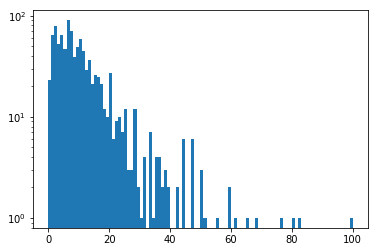

In [59]:
plt.hist(degrees, bins=100, log=True)
plt.show()

In [60]:
import networkx as nx

graph = nx.from_numpy_array(adjacency)

mapping = nodes.author.to_dict()

H=nx.relabel_nodes(graph,mapping)
print(sorted(H.nodes()))

nx.write_gexf(H, 'data/refrence_graph.gexf')

['Aalst J.', 'Abdu R.', 'Abrahamson D.', 'Acosta A.', 'Adanır G. A.', 'Aditomo A.', 'Adleberg B.', 'Agrawal H.', 'Ahn J.', 'Ahonen A. K.', 'Ainsworth S.', 'AlQahtani M.', 'Alameh S.', 'Albrecht J.', 'Aleven V.', 'Allen C. D.', 'Allen L.', 'Allert H.', 'Almatrafi O.', 'Alqassab M.', 'Alstyne R.', 'Amzalag M.', 'Anderson C. G.', 'Anderson E.', 'Anderson J.', 'Anderson R. C.', 'Andrade A.', 'Andrews J. J.', 'Angelo S.', 'Angersbach J.', 'Anjewierden A.', 'Antle A. N.', 'Apollonia S.', 'Applebaum L.', 'Applebaum L. R.', 'Arastoopour G.', 'Arnedillo-Sanchez I.', 'Arnseth H. C.', 'Arvaja M.', 'Arvidsson T. S.', 'Ashley R. W.', 'Askari E.', 'Asterhan C.', 'Awwal N.', 'Ayer T.', 'Azevedo F. S.', 'Azevedo R.', 'Baker R.', 'Bakker A.', 'Bal A.', 'Baltes J.', 'Bang M.', 'Bannan B.', 'Baram-Tsabari A.', 'Barber-Lester K.', 'Barber-Lester K. J.', 'Barcellos M. E.', 'Barrat A.', 'Barron B.', 'Barth-Cohen L. A.', 'Barton A. C.', 'Baruch A. F.', 'Barzilai S.', 'Basu S.', 'Beck S.', 'Becker S.', 'Bell 

# Building the co-citation graph:

In [120]:
references = pd.read_csv('data/References.csv', index_col=0)

In [121]:
references.shape

(8644, 6)

In [122]:
references.columns

Index(['ref', 'file', 'length', 'initial', 'ref_parsed', 'year'], dtype='object')

In [123]:
relevant_cols = ['ref', 'file', 'ref_parsed']

In [124]:
co_citation = pd.merge(references[relevant_cols],references[relevant_cols], on='ref', how='outer')

In [125]:
#remove self loops
co_citation = co_citation[co_citation.file_x != co_citation.file_y]

In [ ]:
co_citation

In [126]:
nodes = pd.DataFrame(co_citation.file_x.drop_duplicates().reset_index(drop=True)).reset_index()
nodes.head()

,index,file_x
0,0,import2016full/61
1,1,import2016full/42
2,2,import2016full/59
3,3,import2015short/287
4,4,import2016short/151


In [133]:
edges = pd.merge(nodes, co_citation, on='file_x')

#edges = pd.merge(nodes, co_citation, left_on='file_x', right_on='file_y')#[['index_x', 'index_y']]

edges.head()

,index,file_x,ref,ref_parsed_x,file_y,ref_parsed_y
0,0,import2016full/61,"Abrahamson, D., Lee, R. G., Negrete, A. G., & ...","Abrahamson, D., Lee, R. G., Negrete, A. G., & ...",import2016full/42,"Abrahamson, D., Lee, R. G., Negrete, A. G., & ..."
1,0,import2016full/61,"Abrahamson, D., Shayan, S., Bakker, A., & Van ...","Abrahamson, D., Shayan, S., Bakker, A., & Van ...",import2016full/42,"Abrahamson, D., Shayan, S., Bakker, A., & Van ..."
2,0,import2016full/61,"Chemero, A. (2009). Radical embodied cognitive...","Chemero, A. (2009)",import2016full/42,"Chemero, A. (2009)"
3,0,import2016full/61,"Piaget, J. (1968). Genetic epistemology (E. Du...","Piaget, J. (1968)",import2016full/42,"Piaget, J. (1968)"
4,0,import2016full/61,"Thelen, E., & Smith, L. B. (1994). A dynamic s...","Thelen, E., & Smith, L. B. (1994)",import2016full/42,"Thelen, E., & Smith, L. B. (1994)"


way to identify reference uniquely without needing entire string...

In [128]:
pd.merge(references,references, on='ref_parsed', how='outer').shape

(21310, 11)

In [129]:
n_nodes = len(nodes)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)

for idx, row in edges.iterrows():
    i, j = int(row.index_x), int(row.index_y)
    adjacency[j, i] = 1
    adjacency[i, j] = 1

In [130]:
adjacency.shape

(298, 298)

In [118]:
graph = nx.from_numpy_array(adjacency)
nx.write_gexf(graph, 'data/co_citation_graph.gexf')